In [1]:
import requests
import json
import pyspark as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
pd.options.display.max_columns = None

In [2]:
csvdf = pd.read_csv('AllPrintingsCSVFiles/cards.csv')
pricedf = pd.read_json('AllPrices.json')
pricedf.reset_index(inplace=True)
df=pricedf.merge(csvdf, how='inner',left_on='index', right_on='uuid')
df.sort_values('edhrecRank',inplace=True)
df=df[df.availability!='mtgo']
# df=df[['name','data','artist','rarity','edhrecRank','isFullArt','hasFoil','isPromo','isReprint','originalReleaseDate','setCode']]

/home/chris/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (12,16,19,40,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.reset_index(inplace=True)

In [135]:
card_name=input("For what card would you like prices?")
setcodes=df[df.name==card_name]['setCode'].values

For what card would you like prices?Underground Sea


In [136]:
print(f'that card is available in {setcodes}')
setid=input("For what set would you like prices?")

that card is available in ['CEI' '3ED' 'LEA' 'CED' '2ED' 'LEB' 'SUM']
For what set would you like prices?LEB


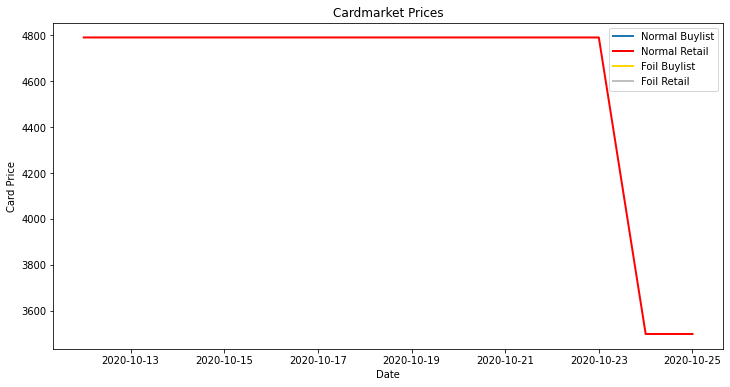

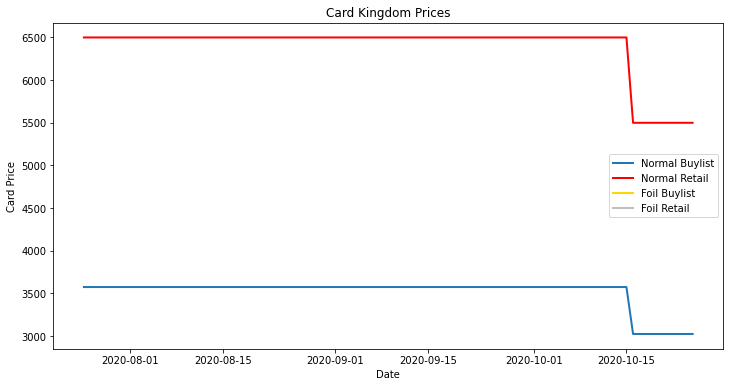

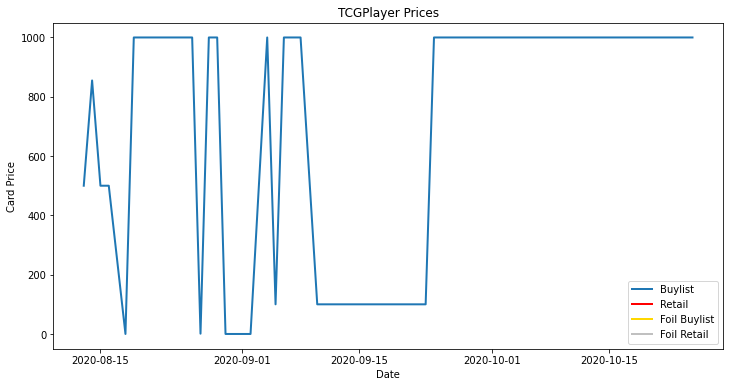

In [137]:
id=df[(df.name==card_name)&(df.setCode==setid)].index
card_price_history(id[0])

In [124]:
def card_price_history(id):
    nckbld=[]
    nckblp=[]
    nckrd=[]
    nckrp=[]
    ncmbld=[]
    ncmblp=[]
    ncmrd=[]
    ncmrp=[]
    ntcgbld=[]
    ntcgblp=[]
    ntcgrd=[]
    ntcgrp=[]
    fckbld=[]
    fckblp=[]
    fckrd=[]
    fckrp=[]
    fcmbld=[]
    fcmblp=[]
    fcmrd=[]
    fcmrp=[]
    ftcgbld=[]
    ftcgblp=[]
    ftcgrd=[]
    ftcgrp=[]
    
    for a,b in df.data[id].items():
        if a == 'paper':
            for c,d in b.items():
                if c == 'cardkingdom':
                    for e,f in d.items():
                        if e == 'buylist':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g == 'normal':
                                        for k,v in h.items():
                                            nckbld.append(k) 
                                            nckblp.append(v)
                                    if g == 'foil':
                                        for k,v in h.items():
                                            fckbld.append(k) 
                                            fckblp.append(v)
                                    

                        if e == 'retail':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g == 'normal':
                                        for k,v in h.items():
                                            nckrd.append(k)
                                            nckrp.append(v)
                                    if g == 'foil':
                                        for k,v in h.items():
                                            fckrd.append(k)
                                            fckrp.append(v)

                if c == 'cardmarket':
                    for e,f in d.items():
                        if e == 'buylist':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g =='normal':
                                        for k,v in h.items():
                                            ncmbld.append(k)
                                            ncmblp.append(v)
                                    if g =='foil':
                                        for k,v in h.items():
                                            fcmbld.append(k)
                                            fcmblp.append(v)

                        if e == 'retail':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g =='normal':
                                        for k,v in h.items():
                                            ncmrd.append(k)
                                            ncmrp.append(v)
                                    if g =='foil':
                                        for k,v in h.items():
                                            fcmrd.append(k)
                                            fcmrp.append(v)

                if c == 'tcgplayer':
                    for e,f in d.items():
                        if e == 'buylist':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g =='normal':
                                        for k,v in h.items():
                                            ntcgbld.append(k)
                                            ntcgblp.append(v)
                                    if g =='foil':
                                        for k,v in h.items():
                                            ftcgbld.append(k)
                                            ftcgblp.append(v)

                        if e == 'retail':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g =='normal':
                                        for k,v in h.items():
                                            ntcgrd.append(k)
                                            ntcgrp.append(v)
                                    if g == 'foil':
                                        for k,v in h.items():
                                            ftcgrd.append(k)
                                            ftcgrp.append(v)


    ncmbld=[datetime.strptime(d, "%Y-%m-%d") for d in ncmbld]
    ncmrd=[datetime.strptime(d, "%Y-%m-%d") for d in ncmrd]
    fcmbld=[datetime.strptime(d, "%Y-%m-%d") for d in fcmbld]
    fcmrd=[datetime.strptime(d, "%Y-%m-%d") for d in fcmrd]
    fig,ax=plt.subplots(figsize=(12,6))
    ax.set_title("Cardmarket Prices")
    ax.set_xlabel("Date")
    ax.set_ylabel("Card Price")
    ax.plot(ncmbld, ncmblp, linewidth=2, zorder=2, label='Normal Buylist')
    ax.plot(ncmrd, ncmrp, color='red',linewidth=2, zorder=2, label='Normal Retail')
    ax.plot(fcmbld, fcmblp, color='gold', linewidth=2, zorder=2, label='Foil Buylist')
    ax.plot(fcmrd, fcmrp, color='silver',linewidth=2, zorder=2, label='Foil Retail')
    ax.legend()

    nckbld=[datetime.strptime(d, "%Y-%m-%d") for d in nckbld]
    nckrd=[datetime.strptime(d, "%Y-%m-%d") for d in nckrd]
    fckbld=[datetime.strptime(d, "%Y-%m-%d") for d in fckbld]
    fckrd=[datetime.strptime(d, "%Y-%m-%d") for d in fckrd]
    fig,ax=plt.subplots(figsize=(12,6))
    ax.set_title("Card Kingdom Prices")
    ax.set_xlabel("Date")
    ax.set_ylabel("Card Price")
    ax.plot(nckbld, nckblp, linewidth=2, zorder=2, label='Normal Buylist')
    ax.plot(nckrd, nckrp, color='red',linewidth=2, zorder=2, label='Normal Retail')
    ax.plot(fckbld, fckblp, color='gold', linewidth=2, zorder=2, label='Foil Buylist')
    ax.plot(fckrd, fckrp, color='silver',linewidth=2, zorder=2, label='Foil Retail')
    ax.legend()

    ntcgbld=[datetime.strptime(d, "%Y-%m-%d") for d in ntcgbld]
    ntcgrd=[datetime.strptime(d, "%Y-%m-%d") for d in ntcgrd]
    ftcgbld=[datetime.strptime(d, "%Y-%m-%d") for d in ftcgbld]
    ftcgrd=[datetime.strptime(d, "%Y-%m-%d") for d in ftcgrd]
    fig,ax=plt.subplots(figsize=(12,6))
    ax.set_title("TCGPlayer Prices")
    ax.set_xlabel("Date")
    ax.set_ylabel("Card Price")
    ax.plot(ntcgbld, ntcgblp, linewidth=2, zorder=2, label='Buylist')
    ax.plot(ntcgrd, ntcgrp, color='red',linewidth=2, zorder=2, label='Retail')
    ax.plot(ftcgbld, ftcgblp, color='gold', linewidth=2, zorder=2, label='Foil Buylist')
    ax.plot(ftcgrd, ftcgrp, color='silver',linewidth=2, zorder=2, label='Foil Retail')
    ax.legend()
    return None